In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 연습문제

In [2]:
# 문제 1
image = []
for i in range(8):
    image.append([3 if c > i else 1 for c in range(8)])
image = np.array(image, dtype=np.uint8)
grad_x = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
grad_y = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)


# (1)
print(grad_x[4, 4], grad_y[4, 4], np.sqrt(((grad_x[4, 4]**2) + (grad_y[4, 4]**2))), np.arctan(grad_y[4, 4]/grad_x[4, 4]))
# (2)
print(grad_x[5, 2], grad_y[5, 2], np.sqrt(((grad_x[5, 2]**2) + (grad_y[5, 2]**2))), np.arctan(grad_y[5, 2]/grad_x[5, 2]))

6.0 -6.0 8.48528137423857 -0.7853982
0.0 0.0 0.0 nan


C:\Users\82104\AppData\Local\Temp\ipykernel_14160\4210671353.py:13: RuntimeWarning: invalid value encountered in float_scalars
  print(grad_x[5, 2], grad_y[5, 2], np.sqrt(((grad_x[5, 2]**2) + (grad_y[5, 2]**2))), np.arctan(grad_y[5, 2]/grad_x[5, 2]))


In [3]:
# 문제 2
region = np.array([[122, 99, 98],
                 [129, 105, 99],
                 [135, 116, 97]])
LBP = np.where(region > 105, 1, 0)
print(LBP) ## 2진수 : 1110001 10진수 : 113
LTP_m = np.where(region < 105 - 10, -1, 0)
LTP_p = np.where(region > 105 + 10, 1, 0)
LTP = np.zeros_like(region) + LTP_m + LTP_p
print(LTP)  ## 위와 동일

[[1 0 0]
 [1 0 0]
 [1 1 0]]
[[1 0 0]
 [1 0 0]
 [1 1 0]]


In [4]:
# 문제 3
'''
edge strength를 threshold를 사용하여 edge point 후보를 줄이고,
edge direction이 반대인 점을 줄여 후보군을 줄이는 효과
'''

'\nedge strength를 threshold를 사용하여 edge point 후보를 줄이고,\nedge direction이 반대인 점을 줄여 후보군을 줄이는 효과\n'

In [5]:
# 문제 4
'''
그림자를 구분할 수 없음
왜냐하면 제시된 알고리즘은 명암 값만을 검출에 이용하기 때문
'''

'\n그림자를 구분할 수 없음\n왜냐하면 제시된 알고리즘은 명암 값만을 검출에 이용하기 때문\n'

In [6]:
# 문제 5
'''
여러 결과를 종합하여 ground truth로 사용하고
output을 0~1 사이의 boundary probability가 되도록 함.

The setup is as follows.  
The human segmented images provide our ground truth boundaries.  We consider any boundary marked by a human subject to be valid.  
Since we have multiple segmentations of each image by different subjects, it is the collection of these human-marked boundaries that constitutes the ground truth.  
We are then presented the output of some algorithm for an image.  
Let us assume that this output is a soft boundary map with one pixel wide boundaries, valued from zero to one where high values signify greater confidence in the existence of a boundary.  
Our task is to determine how well this soft boundary map approximates the ground truth boundaries.
'''

'\n여러 결과를 종합하여 ground truth로 사용하고\noutput을 0~1 사이의 boundary probability가 되도록 함.\n\nThe setup is as follows.  \nThe human segmented images provide our ground truth boundaries.  We consider any boundary marked by a human subject to be valid.  \nSince we have multiple segmentations of each image by different subjects, it is the collection of these human-marked boundaries that constitutes the ground truth.  \nWe are then presented the output of some algorithm for an image.  \nLet us assume that this output is a soft boundary map with one pixel wide boundaries, valued from zero to one where high values signify greater confidence in the existence of a boundary.  \nOur task is to determine how well this soft boundary map approximates the ground truth boundaries.\n'

In [7]:
# 문제 6
## 5는 반복 횟수. 1로 줄이면 품질이 떨어짐
img=cv2.imread('./imgs/soccer.jpg')	# 영상 읽기
img_show=np.copy(img)		# 붓 칠을 디스플레이할 목적의 영상

mask=np.zeros((img.shape[0],img.shape[1]),np.uint8) 
mask[:,:]=cv2.GC_PR_BGD		# 모든 화소를 배경일 것 같음으로 초기화

BrushSiz=9				# 붓의 크기
LColor,RColor=(255,0,0),(0,0,255)	# 파란색(물체)과 빨간색(배경)

def painting(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:   
        cv2.circle(img_show,(x,y),BrushSiz,LColor,-1)	# 왼쪽 버튼 클릭하면 파란색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_FGD,-1)
    elif event==cv2.EVENT_RBUTTONDOWN: 
        cv2.circle(img_show,(x,y),BrushSiz,RColor,-1)	# 오른쪽 버튼 클릭하면 빨간색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_BGD,-1)
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
        cv2.circle(img_show,(x,y),BrushSiz,LColor,-1)# 왼쪽 버튼 클릭하고 이동하면 파란색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_FGD,-1)
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_RBUTTON:
        cv2.circle(img_show,(x,y),BrushSiz,RColor,-1)	# 오른쪽 버튼 클릭하고 이동하면 빨간색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_BGD,-1)

    cv2.imshow('Painting',img_show)
    
cv2.namedWindow('Painting')
cv2.setMouseCallback('Painting',painting)

while(True):				# 붓 칠을 끝내려면 'q' 키를 누름
    if cv2.waitKey(1)==ord('q'): 
        break
    
# 여기부터 GrabCut 적용하는 코드
background=np.zeros((1,65),np.float64)	# 배경 히스토그램 0으로 초기화
foreground=np.zeros((1,65),np.float64)	# 물체 히스토그램 0으로 초기화

cv2.grabCut(img,mask,None,background,foreground,1,cv2.GC_INIT_WITH_MASK)
mask2=np.where((mask==cv2.GC_BGD)|(mask==cv2.GC_PR_BGD),0,1).astype('uint8')
grab=img*mask2[:,:,np.newaxis]
cv2.imshow('Grab cut image',grab)  

cv2.waitKey()
cv2.destroyAllWindows()

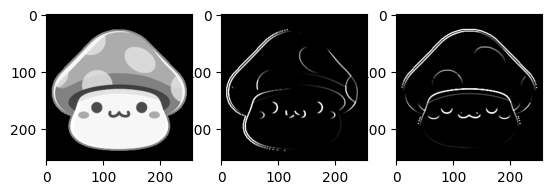

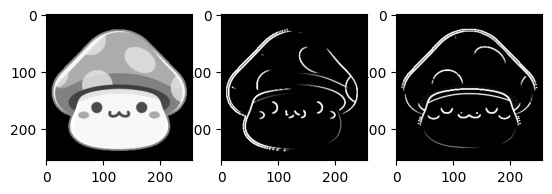

In [8]:
# 문제 07
## Scharr : 3 10 3으로 값 증가
## 대각 검출에도 강함

image = cv2.imread("./imgs/maplestory-256x256.png", cv2.IMREAD_GRAYSCALE)

sobel_x = cv2.Sobel(image, -1, 1, 0)
sobel_y = cv2.Sobel(image, -1, 0, 1)

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(sobel_x, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(sobel_y, cmap="gray")
plt.show()

scharr_x = cv2.Scharr(image, -1, 1, 0)
scharr_y = cv2.Scharr(image, -1, 0, 1)

plt.subplot(1, 3, 1)
plt.imshow(image, cmap="gray")
plt.subplot(1, 3, 2)
plt.imshow(scharr_x, cmap="gray")
plt.subplot(1, 3, 3)
plt.imshow(scharr_y, cmap="gray")
plt.show()

In [9]:
# 문제 8
'''
image : 8-bit image
edges : output edge map
threshold1 : first threshold for the hysteresis procedure
threshold2 : second threshold for the hysteresis procedure
apertureSize : sobel filter size
L2gradient : L2 norm or L1 norm
'''

'\nimage : 8-bit image\nedges : output edge map\nthreshold1 : first threshold for the hysteresis procedure\nthreshold2 : second threshold for the hysteresis procedure\napertureSize : sobel filter size\nL2gradient : L2 norm or L1 norm\n'

In [10]:
# 문제 9
'''
compactness : super-pixel의 모양을 조절. 클수록 네모에 가깝게
n_segments : super-pixel의 수를 조절
'''

'\ncompactness : super-pixel의 모양을 조절. 클수록 네모에 가깝게\nn_segments : super-pixel의 수를 조절\n'

In [13]:
# 문제 10
img=cv2.imread('./imgs/soccer.jpg')	# 영상 읽기
img_show=np.copy(img)		# 붓 칠을 디스플레이할 목적의 영상

mask=np.zeros((img.shape[0],img.shape[1]),np.uint8) 
mask[:,:]=cv2.GC_PR_BGD		# 모든 화소를 배경일 것 같음으로 초기화

BrushSiz=9				# 붓의 크기
LColor,RColor=(255,0,0),(0,0,255)	# 파란색(물체)과 빨간색(배경)

def painting(event,x,y,flags,param):
    if event==cv2.EVENT_LBUTTONDOWN:   
        cv2.circle(img_show,(x,y),BrushSiz,LColor,-1)	# 왼쪽 버튼 클릭하면 파란색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_FGD,-1)
    elif event==cv2.EVENT_RBUTTONDOWN: 
        cv2.circle(img_show,(x,y),BrushSiz,RColor,-1)	# 오른쪽 버튼 클릭하면 빨간색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_BGD,-1)
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_LBUTTON:
        cv2.circle(img_show,(x,y),BrushSiz,LColor,-1)# 왼쪽 버튼 클릭하고 이동하면 파란색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_FGD,-1)
    elif event==cv2.EVENT_MOUSEMOVE and flags==cv2.EVENT_FLAG_RBUTTON:
        cv2.circle(img_show,(x,y),BrushSiz,RColor,-1)	# 오른쪽 버튼 클릭하고 이동하면 빨간색
        cv2.circle(mask,(x,y),BrushSiz,cv2.GC_BGD,-1)

    cv2.imshow('Painting',img_show)
    
cv2.namedWindow('Painting')
cv2.setMouseCallback('Painting',painting)

background=np.zeros((1,65),np.float64)	# 배경 히스토그램 0으로 초기화
foreground=np.zeros((1,65),np.float64)	# 물체 히스토그램 0으로 초기화

while(True):				# 붓 칠을 끝내려면 'q' 키를 누름
    if cv2.waitKey(1)==ord('q'):
        cv2.grabCut(img,mask,None,background,foreground,1,cv2.GC_INIT_WITH_MASK)
        mask2=np.where((mask==cv2.GC_BGD)|(mask==cv2.GC_PR_BGD),0,1).astype('uint8')
        grab=img*mask2[:,:,np.newaxis]
        cv2.imshow('Grab cut image',grab)  
        
        if cv2.waitKey() == ord('r'):
            cv2.destroyAllWindows()
            
            cv2.namedWindow('Painting')
            cv2.setMouseCallback('Painting',painting)
            continue
        elif cv2.waitKey() == ord('e'):
            break
            
cv2.destroyAllWindows()